In [9]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import pandas as pd
from config import api_key
api_key = #API Key

In [10]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
query_url
response = requests.get(query_url + city).json()
response

{'coord': {'lon': 2.3488, 'lat': 48.8534},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 13.95,
  'feels_like': 12.99,
  'temp_min': 12.34,
  'temp_max': 16.04,
  'pressure': 1021,
  'humidity': 61},
 'visibility': 10000,
 'wind': {'speed': 7.72, 'deg': 40},
 'clouds': {'all': 75},
 'dt': 1681817332,
 'sys': {'type': 2,
  'id': 2041230,
  'country': 'FR',
  'sunrise': 1681793671,
  'sunset': 1681843508},
 'timezone': 7200,
 'id': 2988507,
 'name': 'Paris',
 'cod': 200}

In [11]:
# List of cities
cities = ["Paris", "London", "Oslo", "Beijing"]

# set up lists to hold reponse info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.8534, 51.5085, 59.9127, 39.9075]
The temperature information received is: [13.95, 10.95, 14.87, 22.94]


In [12]:
# create a DataFrame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,lat,temp
0,Paris,48.8534,13.95
1,London,51.5085,10.95
2,Oslo,59.9127,14.87
3,Beijing,39.9075,22.94


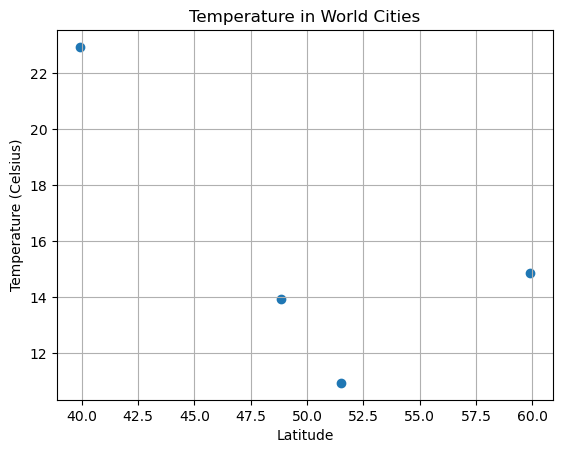

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()